<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# DSI-SG-42 Project 3: Web APIs & NLP
### Reddit Scams: Are We Vulnerable?
---

## 4. Clustering & Principal Component Analysis

### 4.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage

### 4.2 Import scraped dataset

In [2]:
df = pd.read_csv('imputed_data.csv')
df.head()

,age,height,weight,bmi,yrssmok,packday,yrsquit,sleep_hours,health_status,phys_health_not_good,...,asthma_status,race_ethnicity,sex,education,income,smoker_status,e_cig_smoker,binge_drinker,heavy_drinker,chd_mi
0,80.0,1.734514,84.290327,28.075576,0.0,0.0,0.0,8.0,2.0,1.0,...,3.0,1.0,2.0,4.0,7.0,4.0,1.0,1.0,1.0,2.0
1,80.0,1.600000,68.040000,26.580000,0.0,0.0,0.0,6.0,1.0,1.0,...,3.0,1.0,2.0,2.0,5.0,4.0,1.0,1.0,1.0,2.0
2,56.0,1.570000,63.500000,25.760000,0.0,0.0,0.0,5.0,2.0,2.0,...,3.0,1.0,2.0,4.0,10.0,4.0,1.0,1.0,1.0,2.0
3,73.0,1.650000,63.500000,23.320000,0.0,0.0,0.0,7.0,1.0,1.0,...,1.0,1.0,2.0,2.0,6.0,2.0,1.0,1.0,1.0,2.0
4,43.0,1.570000,53.980000,21.900000,0.0,0.0,0.0,9.0,4.0,2.0,...,3.0,1.0,2.0,3.0,5.0,4.0,1.0,1.0,1.0,2.0


### 4.3 Principal Component Analysis

In [3]:
X = df.drop('chd_mi', axis=1)
y = df['chd_mi']

In [4]:
if y.isnull().any():
    # Handle or drop NaN values in y
    y = y.fillna(method='ffill')  # Example: forward fill

In [5]:
# Instantiating StandardScaler
ss = StandardScaler()

# Instantiating Imputer
imputer = SimpleImputer(strategy='most_frequent')

In [6]:
# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Creating column transformers for both types of data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

# Fit the preprocessor and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Retrieve the column names
column_names = preprocessor.get_feature_names_out()

# Create a DataFrame with the preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=column_names)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, stratify=y, random_state=42)


In [7]:
pca = PCA(n_components=2)  # for example, reduce the data to 2 dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Assuming you've decided on a number of clusters, e.g., 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)  # Perform clustering on the PCA-reduced data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


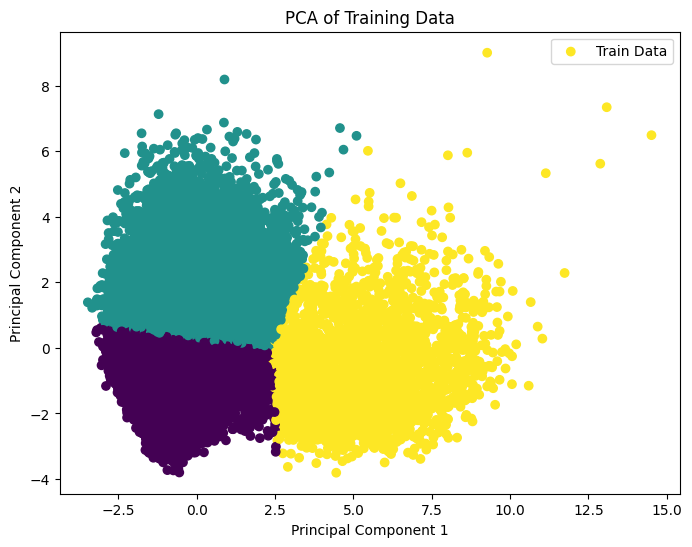

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', label='Train Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Data')
plt.legend()
plt.show()

In [9]:
pca.explained_variance_ratio_

array([0.11229215, 0.09781882])

### 4.3 Clustering

#### 4.3.1 K-Means Clustering

Use Case: K-Means is suitable for identifying groups with similar risk profiles based on numerical features such as age, health status, cholesterol levels, etc. It’s useful for partitioning the dataset into a predefined number of clusters (e.g., low, medium, and high risk).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


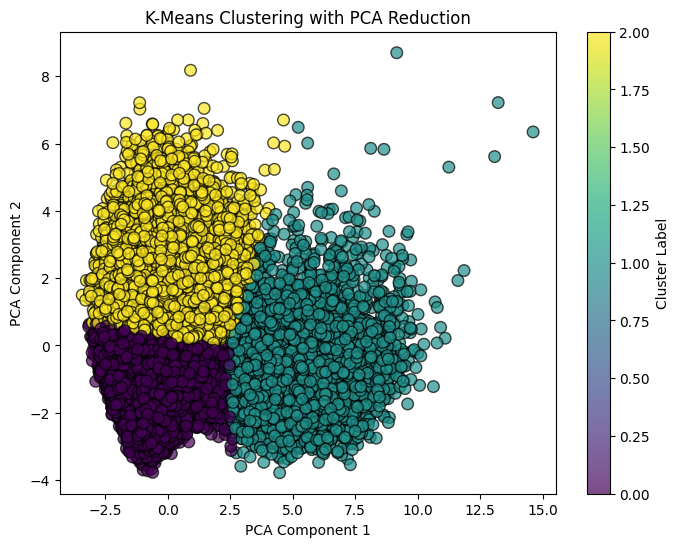

In [10]:
# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define 'X' and 'y'
X = df.drop('chd_mi', axis=1)
y = df['chd_mi']

from sklearn.preprocessing import StandardScaler
# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute numerical data
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical data
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols),
    ])

# Pipeline for preprocessing and PCA
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))  # Reduce the data to 2 principal components for visualization
])

X_processed_pca = pipe.fit_transform(X)

# Perform K-Means Clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed_pca)  # fit_predict() both fits the model and predicts the cluster labels

# Visualization of Clusters after PCA Reduction
plt.figure(figsize=(8, 6))
plt.scatter(X_processed_pca[:, 0], X_processed_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=70, alpha=0.7)
plt.title('K-Means Clustering with PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

**Analysis:**

* Points: Each point on the scatter plot represents an observation from the dataset after it has been transformed into the new PCA space. The location of a point is determined by its scores on the first and second principal components.

* Colors: The color of each point indicates the cluster that K-Means assigned the observation to. The color bar on the right shows the mapping between colors and cluster labels, suggesting that there are at least three clusters (possibly more if the scale goes beyond 2).

* Cluster Distribution: The clusters appear to be stratified mostly along the first principal component (x-axis), meaning that this component is significant in differentiating between the clusters identified by K-Means. This might suggest that the first principal component captures some underlying feature(s) or combination of features that are influential in defining the clusters.

* Potential Overlap: There appears to be some degree of overlap between clusters, especially between the yellow and purple clusters, as observed along the second principal component. This could suggest that the separation between these clusters is not very distinct in the PCA-reduced feature space, or that the clusters are not perfectly spherical, which is an assumption of K-Means.

* Outliers: There are a few points that are situated far from the main cluster body along the PCA Component 1. These could be outliers in the dataset, or they could represent rare observations that are significantly different from the others.

* Further Analysis: For actionable insights or detailed analysis, you would typically map these clusters back to the original data to investigate the defining characteristics of each cluster, which may involve examining the centroids of the clusters in the space of the original features.

Centroids of each cluster in PCA-reduced space:
[[-0.48113886 -1.06689462]
 [ 5.45014555 -0.68108085]
 [-0.13923201  1.6901098 ]]


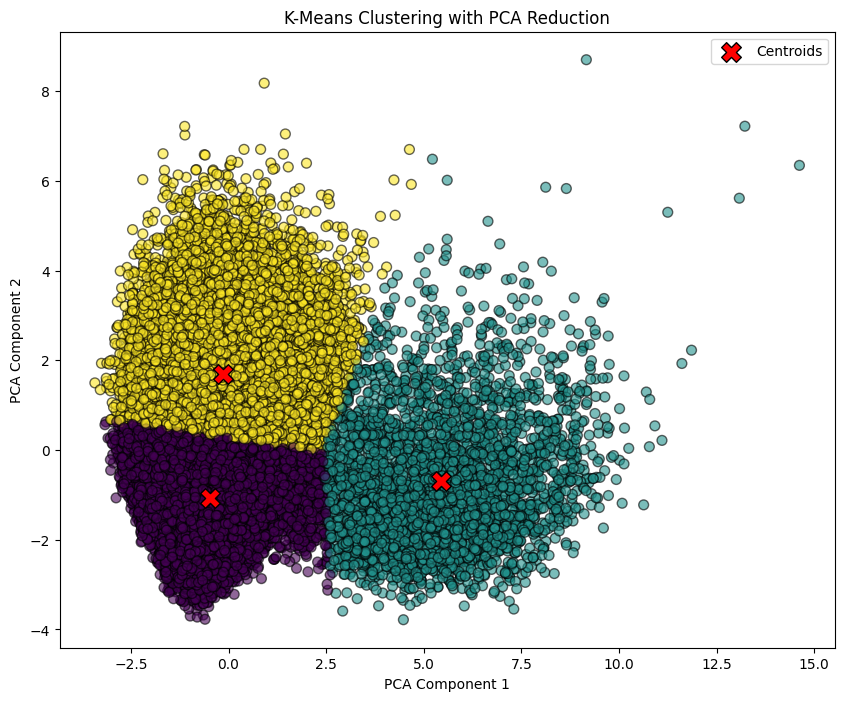

In [11]:
# Examine the centroids of each cluster
centroids = kmeans.cluster_centers_

# Print the centroids (Note: They're in the PCA-reduced space)
print("Centroids of each cluster in PCA-reduced space:")
print(centroids)

# Visualization of clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_processed_pca[:, 0], X_processed_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', edgecolor='k', label='Centroids')

plt.title('K-Means Clustering with PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

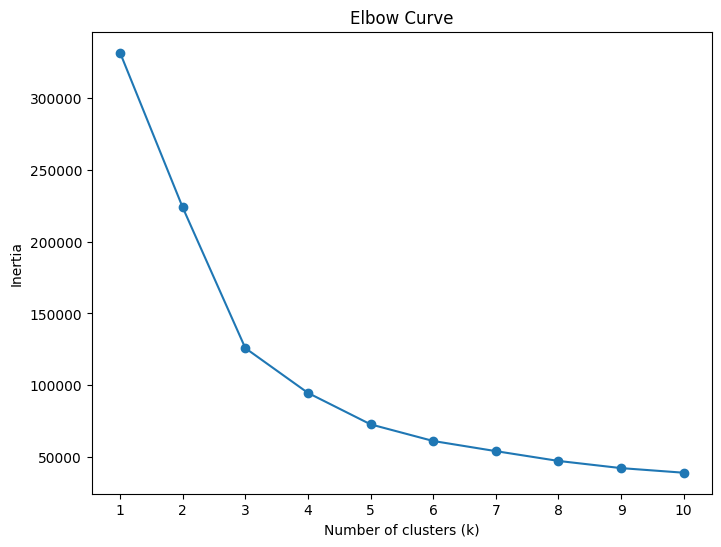

In [12]:
# Determine the Elbow Curve
inertia = []
k_values = range(1, 11)  # Example range from 1 to 10 clusters

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_processed_pca)
    inertia.append(model.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, '-o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

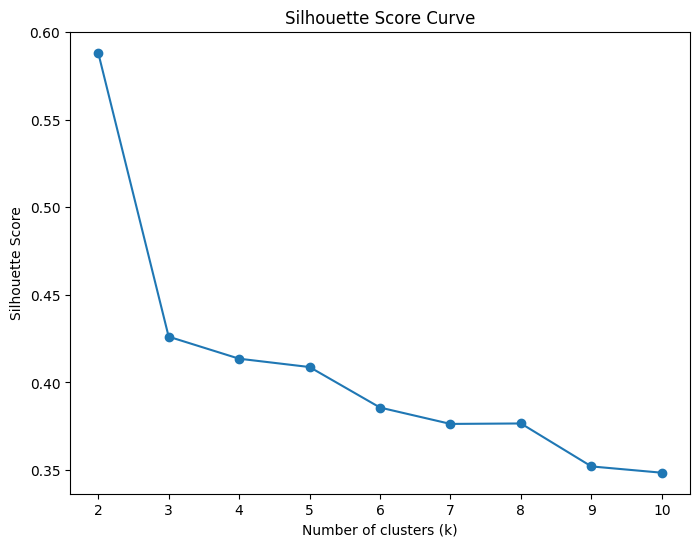

In [13]:
# Determine the Silhouette Score
# Note: silhouette_score requires a minimum of 2 clusters, and doesn't make sense for a single cluster
from sklearn.metrics import silhouette_score
silhouette_scores = []

for k in k_values[1:]:  # Start from 2 clusters
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(X_processed_pca)
    silhouette_avg = silhouette_score(X_processed_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values[1:], silhouette_scores, '-o')
plt.title('Silhouette Score Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values[1:])
plt.show()

#### 4.3.2 Hierarchical Clustering
Use Case: This method is ideal for creating a patient dendrogram to visualize the patient similarity hierarchy. It can help in identifying patient subgroups with varying risk levels without specifying the number of clusters upfront.

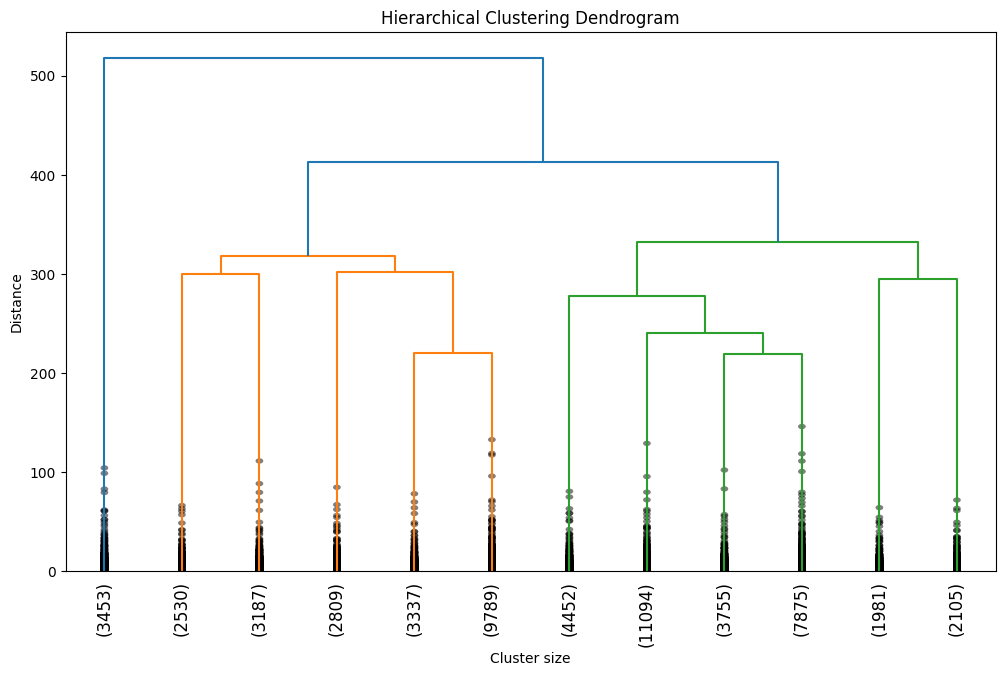

In [14]:
# Define 'X' and 'y'
X = df.drop('chd_mi', axis=1)
y = df['chd_mi']

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define 'X' and 'y'
X = df.drop('chd_mi', axis=1)
y = df['chd_mi']

# Preprocessing pipelines for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols),
    ])

X_processed = preprocessor.fit_transform(X)

# Check if the result is a sparse matrix and convert it if necessary
if isinstance(X_processed, np.ndarray):
    # If it's already a dense array, use it as is
    X_processed_dense = X_processed
else:
    # If the result is a sparse matrix, convert it to a dense array
    X_processed_dense = X_processed.toarray()

# Apply hierarchical clustering
Z = linkage(X_processed_dense, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last 12 merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

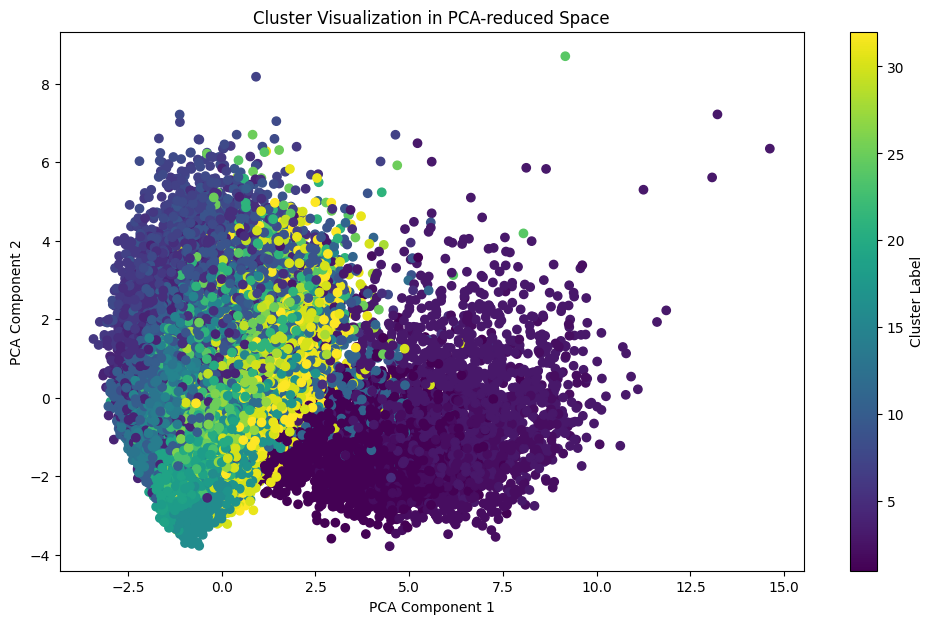

In [15]:
# Visualising Cluster (Hierarchical)
from scipy.cluster.hierarchy import fcluster

# Cut-off the dendrogram to form flat clusters
distance_cutoff = 100  # This is an arbitrary cutoff. Adjust the value as needed based on the dendrogram.
clusters = fcluster(Z, t=distance_cutoff, criterion='distance')

# Reduce dimensions to 2D for visualization, if not already reduced
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed_dense)

# Plot the clusters
plt.figure(figsize=(12, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization in PCA-reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [16]:
# Evaluating Clustering Quality: Silhouette Score (Hierachical)

# Calculate silhouette score only if more than one cluster is present
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X_processed_dense, clusters)
    print(f"The average silhouette score for the clusters is: {silhouette_avg}")
else:
    print("Silhouette score cannot be calculated for a single cluster.")

The average silhouette score for the clusters is: 0.04916125690767188


#### 4.3.3  DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Use Case: DBSCAN is useful if you suspect the data might contain outliers (e.g., atypical patient profiles) or if clusters might have irregular shapes. It groups together points that are closely packed together and marks points in low-density regions as outliers.

In [17]:
# Preprocessing pipelines for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols),
    ])


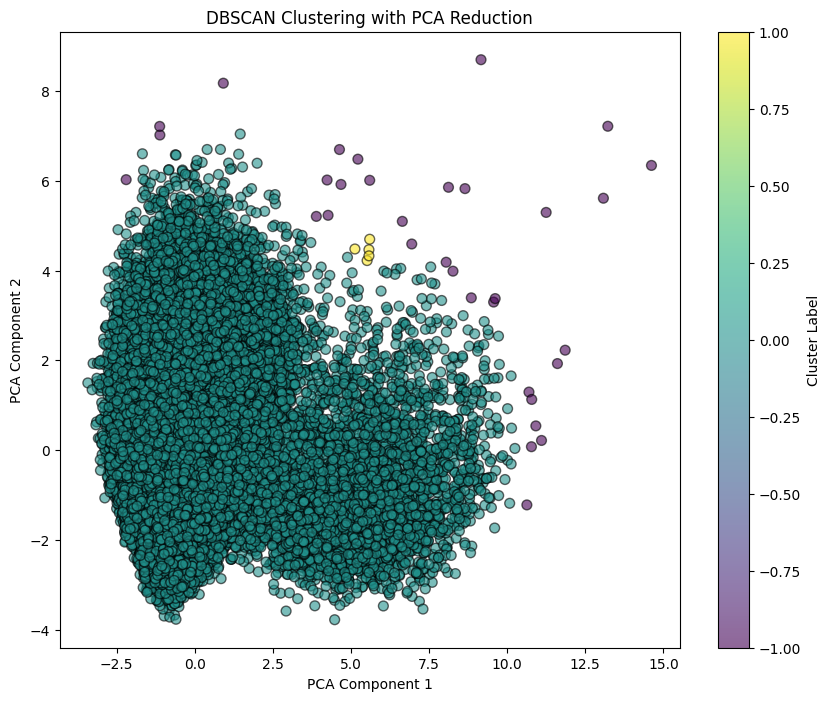

In [18]:
# Apply preprocessing and fit the DBSCAN model
from sklearn.cluster import DBSCAN
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('pca', PCA(n_components=2)),  # PCA for visualization
                       ('dbscan', DBSCAN(eps=0.5, min_samples=5))])  # Example DBSCAN parameters

# Fit the pipeline and predict clusters
pipe.fit(X)
X_pca = pipe.named_steps['pca'].transform(pipe.named_steps['preprocessor'].transform(X))
clusters = pipe.named_steps['dbscan'].labels_

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('DBSCAN Clustering with PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

##### Pairplot

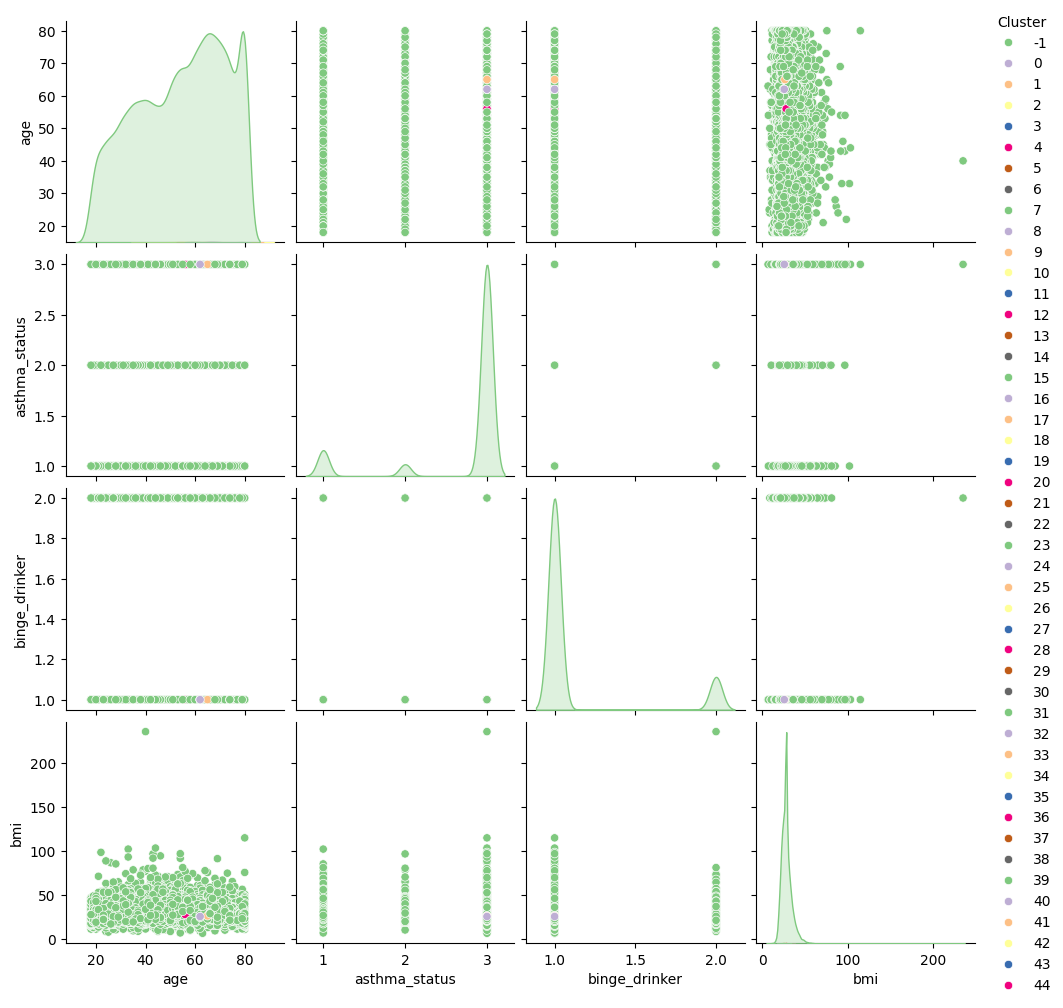

In [19]:
X = df.drop(columns=['chd_mi'])

# Define categorical and numeric columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'chd_mi' from numeric_features using .difference() for Pandas Index objects
numeric_features = numeric_features.difference(['chd_mi'])

# Create a column transformer with OneHotEncoder for categorical variables and StandardScaler for numeric variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example parameters
clusters = dbscan.fit_predict(X_preprocessed)

# Assuming we're dealing with a large number of transformed features, which complicates direct column naming
# Add the cluster labels to the original DataFrame for visualization
df['Cluster'] = clusters

# For pairplot, select a few relevant features plus the Cluster column to avoid overloading the plot
selected_columns = numeric_features.tolist()[:4]  # Just an example to select a few numeric features
selected_columns.append('Cluster')

# Create a pairplot with the cluster labels using the original DataFrame for simplicity
sns.pairplot(df[selected_columns], hue='Cluster', palette='Accent')
plt.savefig('pairplot.png')  # Save the plot if needed
plt.show()

##### DBSCAN (Outlier detection)

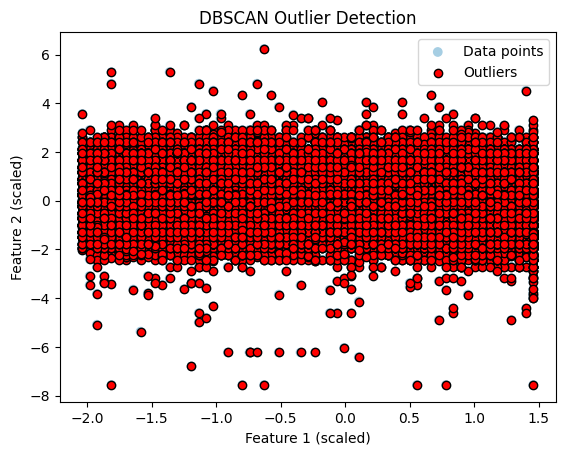

In [20]:
# Outlier detection (Numerical columns)
# Assuming 'df' is your DataFrame and 'numerical_cols' identifies the numeric columns to use
X = df[numerical_cols]

# Create a pipeline that first imputes missing values then scales the data
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values with the mean of each column
    StandardScaler()  # Then, standardize the features
)

# Fit and transform the pipeline on the data
X_processed = pipeline.fit_transform(X)

# Run DBSCAN on the processed data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_processed)

# Assuming X_processed has more than one dimension, you can visualize the first two
plt.scatter(X_processed[:, 0], X_processed[:, 1], c=clusters, cmap='Paired', label='Data points')
plt.scatter(X_processed[clusters == -1, 0], X_processed[clusters == -1, 1], c='red', label='Outliers', edgecolor='black')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('DBSCAN Outlier Detection')
plt.legend()
plt.show()

##### EDA

In [21]:
# Summary statistics for numerical features by cluster
cluster_summary = df.groupby('Cluster').describe()

print(cluster_summary)

             age                                                        \
           count       mean        std   min    25%   50%    75%   max   
Cluster                                                                  
-1       55895.0  54.040791  17.770890  18.0  40.00  56.0  69.00  80.0   
 0          30.0  67.400000   3.409925  61.0  65.25  67.0  69.00  77.0   
 1          24.0  67.916667   5.380453  61.0  64.00  66.5  71.25  79.0   
 2          75.0  61.720000   9.387398  46.0  54.50  60.0  68.50  80.0   
 3          29.0  59.620690   4.670682  50.0  56.00  60.0  62.00  67.0   
 4          23.0  55.826087   4.763995  47.0  52.50  55.0  59.00  65.0   
 5           5.0  59.600000   3.781534  55.0  56.00  62.0  62.00  63.0   
 6           7.0  72.428571   2.935821  69.0  70.50  71.0  74.50  77.0   
 7          22.0  75.454545   4.020510  69.0  72.00  77.0  79.50  80.0   
 8          31.0  60.451613   7.615067  46.0  54.00  59.0  66.50  75.0   
 9           5.0  78.800000   1.788854

In [22]:
X = df.drop('chd_mi', axis=1)
y = df['chd_mi']  # Assuming 'chd_mi' is the target variable

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols),
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_preprocessed)


In [23]:
df_clusters = df.copy()
df_clusters['Cluster'] = clusters

In [24]:
# Group by cluster and compute statistical summaries
cluster_summary = df_clusters.groupby('Cluster')[numerical_cols].mean()
print(cluster_summary)

               age    height      weight        bmi    yrssmok   packday  \
Cluster                                                                    
-1       54.041305  1.704488   81.873433  28.098796   3.069074  0.053892   
 0       67.400000  1.770984   82.009331  26.169718   0.000000  0.000000   
 1       67.916667  1.687898   78.390515  27.486132   0.000000  0.000000   
 2       61.720000  1.771122   81.261929  25.888429   0.000000  0.000000   
 3       59.620690  1.778966   79.203437  25.029346   0.000000  0.000000   
 4       55.826087  1.698134   79.877767  27.683834   0.000000  0.000000   
 5       59.600000  1.606000   60.328000  23.400000   0.000000  0.000000   
 6       72.428571  1.734514   84.290327  28.075576  55.419021  0.710301   
 7       75.454545  1.771818   80.510909  25.661818   0.000000  0.000000   
 8       60.451613  1.652581   69.516399  25.488661   0.000000  0.000000   
 9       78.800000  1.582000   62.592000  25.016000   0.000000  0.000000   
 10      52.

In [25]:
# Group by cluster and compute statistical summaries
cluster_summary = df_clusters.groupby('Cluster')[numerical_cols].mean()
print(cluster_summary)

               age    height      weight        bmi    yrssmok   packday  \
Cluster                                                                    
-1       54.041305  1.704488   81.873433  28.098796   3.069074  0.053892   
 0       67.400000  1.770984   82.009331  26.169718   0.000000  0.000000   
 1       67.916667  1.687898   78.390515  27.486132   0.000000  0.000000   
 2       61.720000  1.771122   81.261929  25.888429   0.000000  0.000000   
 3       59.620690  1.778966   79.203437  25.029346   0.000000  0.000000   
 4       55.826087  1.698134   79.877767  27.683834   0.000000  0.000000   
 5       59.600000  1.606000   60.328000  23.400000   0.000000  0.000000   
 6       72.428571  1.734514   84.290327  28.075576  55.419021  0.710301   
 7       75.454545  1.771818   80.510909  25.661818   0.000000  0.000000   
 8       60.451613  1.652581   69.516399  25.488661   0.000000  0.000000   
 9       78.800000  1.582000   62.592000  25.016000   0.000000  0.000000   
 10      52.

In [29]:
# Function to calculate mode for categorical features
def calculate_mode(series):
    if not series.mode().empty:
        return series.mode()[0]  # Return the first mode
    else:
        return None  # Return None if no mode

# Make sure 'Cluster' and all 'categorical_cols' exist in 'df_clusters'
if 'Cluster' in df_clusters.columns and all(col in df_clusters.columns for col in categorical_cols):
    # Group by cluster and compute mode for categorical columns
    cluster_mode = df_clusters.groupby('Cluster')[categorical_cols].agg(calculate_mode)
    print(cluster_mode)
else:
    print("Error: Ensure 'Cluster' and all categorical columns exist in 'df_clusters'")



Empty DataFrame
Columns: []
Index: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


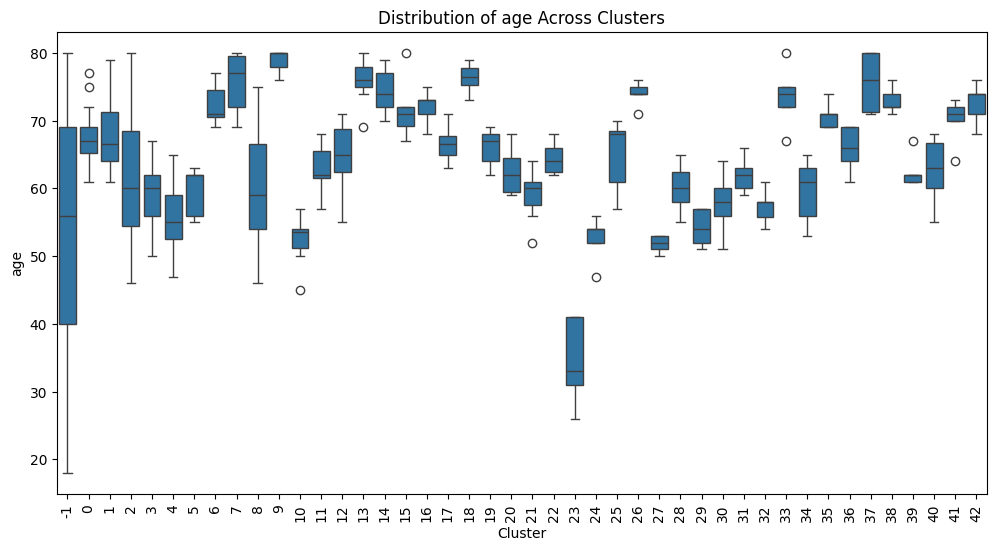

In [30]:
# Select a numerical feature to visualize
feature_to_visualize = 'age'

# Plot the distribution of a numerical feature for each cluster
plt.figure(figsize=(12, 6))  # Increase the figure size
sns.boxplot(x='Cluster', y=feature_to_visualize, data=df_clusters)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()

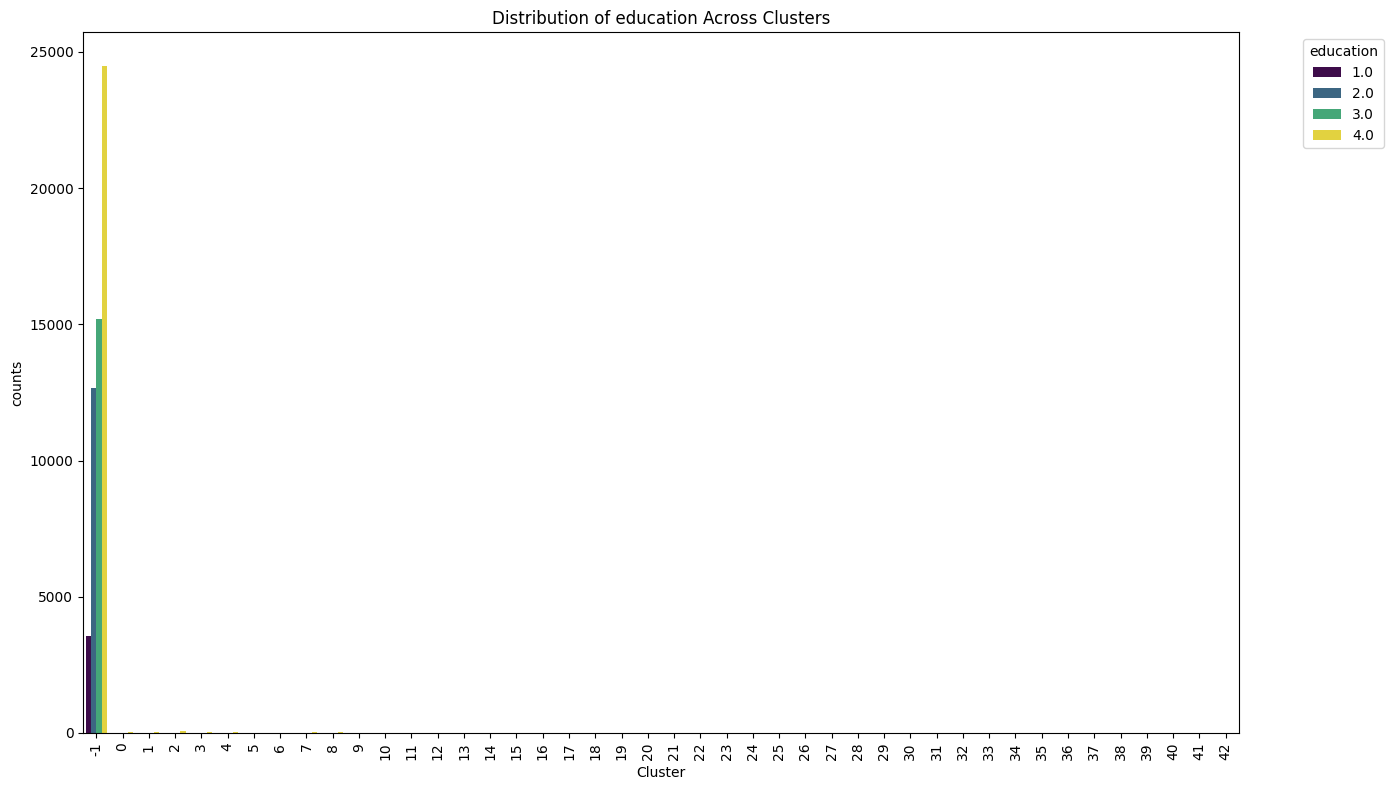

In [31]:
# Select a categorical feature to visualize
categorical_feature_to_visualize = 'education'

# Plot the distribution of a categorical feature for each cluster
plt.figure(figsize=(14, 8))  # Increase the figure size for better readability
cluster_counts = df_clusters.groupby(['Cluster', categorical_feature_to_visualize]).size().reset_index(name='counts')
sns.barplot(x='Cluster', y='counts', hue=categorical_feature_to_visualize, data=cluster_counts, palette='viridis')
plt.xticks(rotation=90)  # Rotate the x-axis labels to prevent overlap
plt.title(f'Distribution of {categorical_feature_to_visualize} Across Clusters')
plt.legend(title=categorical_feature_to_visualize, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot
plt.tight_layout()  # Adjust the layout
plt.show()